# Telecom Customer Churn EDA

This notebook explores and visualizes the Telecom Customer Churn dataset, with step-by-step observations after each analysis.

## 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

**Observation:**  
Essential libraries for data analysis and visualization are imported. Seaborn's style is set for better plots.

## 2. Load the Dataset

In [5]:
df = pd.read_csv("Data/TelecoCustomerChurn.csv")
print("Initial shape:", df.shape)

Initial shape: (7043, 21)


**Observation:**  
The dataset is loaded. The initial shape shows the number of rows and columns present.

## 3. Inspect Data Types, Missing Values, and Duplicates

In [6]:
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilli

**Observation:**  
- Data types for each column are displayed.
- Missing values are checked for all columns.
- The number of duplicate rows is reported.

## 4. Clean the 'TotalCharges' Column

In [7]:
# Convert 'TotalCharges' to numeric (errors='coerce' will convert invalid entries to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nTotalCharges - NaN count after conversion:", df['TotalCharges'].isna().sum())


TotalCharges - NaN count after conversion: 11


**Observation:**  
Some entries in 'TotalCharges' could not be converted to numbers and became NaN. The count of such NaN values is shown.

In [8]:
# Drop rows with missing TotalCharges (they likely had 0 tenure anyway)
df = df.dropna(subset=['TotalCharges'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Confirm changes
print("Shape after cleaning:", df.shape)
print("\nUpdated data types:\n", df.dtypes)

Shape after cleaning: (7032, 21)

Updated data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


**Observation:**  
Rows with missing 'TotalCharges' are dropped, reducing the dataset size. Data types are updated and confirmed.

## 5. Encode Categorical Variables

In [9]:
# Convert categorical columns with 'Yes/No' to binary
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert 'gender' to binary
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

**Observation:**  
Columns with 'Yes'/'No' values and 'gender' are converted to binary (1/0), making them suitable for analysis and modeling.

## 6. Visualizations and Insights

### a. Churn Rate

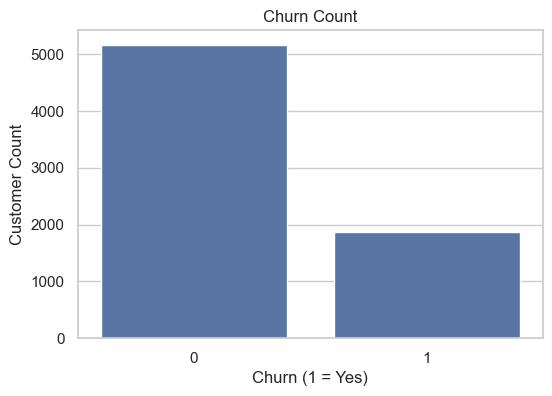

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.xlabel('Churn (1 = Yes)')
plt.ylabel('Customer Count')
plt.show()

**Observation:**  
The dataset is imbalanced, with more customers not churning (Churn=0) than churning (Churn=1).

### b. Contract Type vs Churn

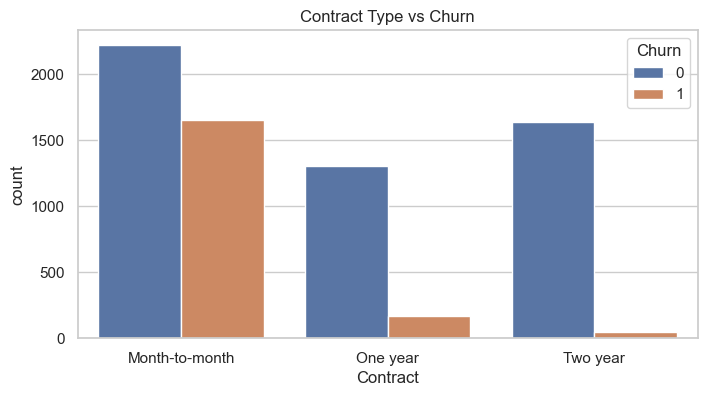

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

**Observation:**  
Month-to-month contracts have a much higher churn rate compared to one-year or two-year contracts.

### c. Monthly Charges vs Churn

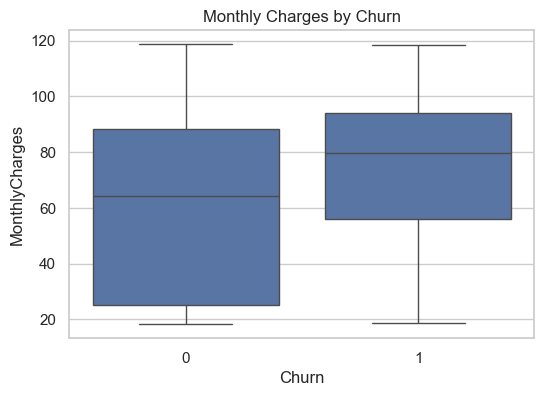

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

**Observation:**  
Customers who churn tend to have higher monthly charges on average.

### d. Tenure vs Churn

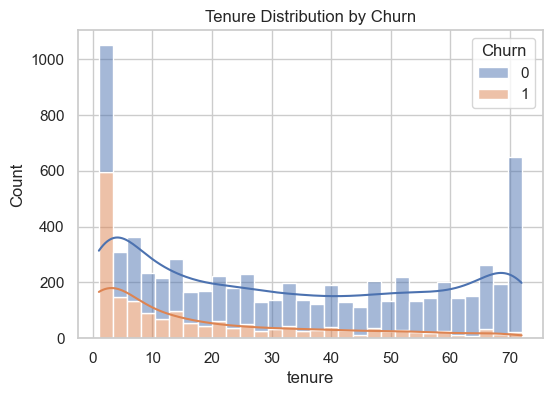

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

**Observation:**  
Customers with shorter tenure are more likely to churn. Long-tenured customers rarely churn.

### e. Total Charges vs Churn

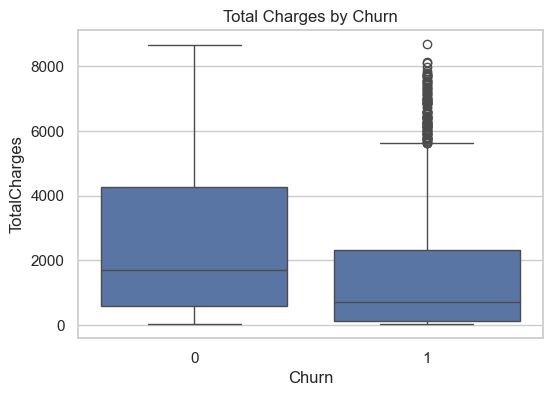

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')
plt.show()

**Observation:**  
Customers who churn generally have lower total charges, likely due to shorter tenure.

## Final Summary

- The dataset required cleaning, especially for the 'TotalCharges' column.
- Churn is more common among customers with month-to-month contracts, higher monthly charges, and shorter tenure.
- The dataset is imbalanced, with fewer churned customers.
- Visualizations provide clear insights into the factors affecting customer churn.